In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [68]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [69]:
file_path='/content/drive/MyDrive/nyc-rolling-sales-1.csv'

In [70]:
df = pd.read_csv(file_path)

In [71]:
df.head(3)

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,...,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,...,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00


In [72]:
df.dtypes

Unnamed: 0                         int64
BOROUGH                            int64
NEIGHBORHOOD                      object
BUILDING CLASS CATEGORY           object
TAX CLASS AT PRESENT              object
BLOCK                              int64
LOT                                int64
EASE-MENT                         object
BUILDING CLASS AT PRESENT         object
ADDRESS                           object
APARTMENT NUMBER                  object
ZIP CODE                           int64
RESIDENTIAL UNITS                  int64
COMMERCIAL UNITS                   int64
TOTAL UNITS                        int64
LAND SQUARE FEET                  object
GROSS SQUARE FEET                 object
YEAR BUILT                         int64
TAX CLASS AT TIME OF SALE          int64
BUILDING CLASS AT TIME OF SALE    object
SALE PRICE                        object
SALE DATE                         object
dtype: object

In [73]:
df['BUILDING CLASS AT TIME OF SALE'].value_counts()

R4    12989
D4    12666
A1     6751
A5     5671
B2     4918
      ...  
I3        1
R7        1
Q8        1
Y1        1
Z7        1
Name: BUILDING CLASS AT TIME OF SALE, Length: 166, dtype: int64

In [74]:
#column names
df.columns

Index(['Unnamed: 0', 'BOROUGH', 'NEIGHBORHOOD', 'BUILDING CLASS CATEGORY',
       'TAX CLASS AT PRESENT', 'BLOCK', 'LOT', 'EASE-MENT',
       'BUILDING CLASS AT PRESENT', 'ADDRESS', 'APARTMENT NUMBER', 'ZIP CODE',
       'RESIDENTIAL UNITS', 'COMMERCIAL UNITS', 'TOTAL UNITS',
       'LAND SQUARE FEET', 'GROSS SQUARE FEET', 'YEAR BUILT',
       'TAX CLASS AT TIME OF SALE', 'BUILDING CLASS AT TIME OF SALE',
       'SALE PRICE', 'SALE DATE'],
      dtype='object')

In [75]:
#Selected columns
df_2=df[['BOROUGH','TAX CLASS AT PRESENT','TOTAL UNITS','LAND SQUARE FEET', 'GROSS SQUARE FEET', 'YEAR BUILT','SALE PRICE','SALE DATE']]

In [76]:
#selected columns data types
df_2.dtypes

BOROUGH                  int64
TAX CLASS AT PRESENT    object
TOTAL UNITS              int64
LAND SQUARE FEET        object
GROSS SQUARE FEET       object
YEAR BUILT               int64
SALE PRICE              object
SALE DATE               object
dtype: object

In [77]:
#Replace hyphen entries to np.nan and remove these values.
cols_to_clean=['LAND SQUARE FEET',"GROSS SQUARE FEET","SALE PRICE"]
df_2[cols_to_clean] = df_2[cols_to_clean].apply(lambda x: x.str.strip().replace(r'^-$', np.nan, regex=True))
df_2 = df_2.dropna()

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [78]:
#numerical values to int64
df_2[['LAND SQUARE FEET',"GROSS SQUARE FEET","SALE PRICE"]]= df_2[['LAND SQUARE FEET',"GROSS SQUARE FEET","SALE PRICE"]].astype('int64')
df_2.dtypes

BOROUGH                  int64
TAX CLASS AT PRESENT    object
TOTAL UNITS              int64
LAND SQUARE FEET         int64
GROSS SQUARE FEET        int64
YEAR BUILT               int64
SALE PRICE               int64
SALE DATE               object
dtype: object

In [79]:
#Convert SALE DATE to datetime
df_2['SALE DATE']=pd.to_datetime(df_2['SALE DATE'])

<ipython-input-79-e985dc89c188>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2['SALE DATE']=pd.to_datetime(df_2['SALE DATE'])


In [80]:
df_2.head(10)

,BOROUGH,TAX CLASS AT PRESENT,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,SALE PRICE,SALE DATE
0,1,2A,5,1633,6440,1900,6625000,2017-07-19
3,1,2B,10,2272,6794,1913,3936272,2016-09-23
4,1,2A,6,2369,4615,1900,8000000,2016-11-17
6,1,2B,8,1750,4226,1920,3192840,2016-09-23
9,1,2,24,4489,18523,1920,16232000,2016-11-07
11,1,2B,10,3717,12350,2009,10350000,2016-10-17
22,1,2,24,4131,16776,1928,11900000,2017-06-21
172,1,2A,4,1520,3360,1910,3300000,2016-11-15
173,1,2A,5,2201,5608,1900,7215000,2017-01-30
174,1,2A,6,1779,3713,1910,4750000,2017-04-03


In [81]:
df_3 = df_2[~(df_2==0).any(axis=1)]

In [82]:
zero_counts = df_3.isin([0]).sum()
zero_counts

BOROUGH                 0
TAX CLASS AT PRESENT    0
TOTAL UNITS             0
LAND SQUARE FEET        0
GROSS SQUARE FEET       0
YEAR BUILT              0
SALE PRICE              0
SALE DATE               0
dtype: int64

In [83]:
na_counts =df_3.isna().sum()
na_counts

BOROUGH                 0
TAX CLASS AT PRESENT    0
TOTAL UNITS             0
LAND SQUARE FEET        0
GROSS SQUARE FEET       0
YEAR BUILT              0
SALE PRICE              0
SALE DATE               0
dtype: int64

In [84]:
df_3.describe()

,BOROUGH,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,SALE PRICE
count,29281.000000,29281.000000,2.928100e+04,2.928100e+04,29281.000000,2.928100e+04
mean,3.534920,3.382262,4.218900e+03,4.606149e+03,1940.708753,1.636911e+06
std,1.019759,24.596033,3.553716e+04,3.413164e+04,30.540755,1.700815e+07
min,1.000000,1.000000,2.000000e+02,1.200000e+02,1800.000000,1.000000e+00
25%,3.000000,1.000000,2.000000e+03,1.360000e+03,1920.000000,4.200000e+05
50%,4.000000,2.000000,2.500000e+03,1.872000e+03,1930.000000,6.200000e+05
75%,4.000000,2.000000,4.000000e+03,2.672000e+03,1960.000000,9.500000e+05
max,5.000000,2261.000000,4.228300e+06,3.750565e+06,2017.000000,2.210000e+09


In [85]:
#Convert DATE BUILT to datetime drop the original column
df_3['DATE BUILT'] = pd.to_datetime(df_3['YEAR BUILT'], format='%Y')
df_4=df_3.drop('YEAR BUILT', axis=1)

<ipython-input-85-a5640b263530>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_3['DATE BUILT'] = pd.to_datetime(df_3['YEAR BUILT'], format='%Y')


In [86]:
df_3.dtypes

BOROUGH                          int64
TAX CLASS AT PRESENT            object
TOTAL UNITS                      int64
LAND SQUARE FEET                 int64
GROSS SQUARE FEET                int64
YEAR BUILT                       int64
SALE PRICE                       int64
SALE DATE               datetime64[ns]
DATE BUILT              datetime64[ns]
dtype: object

In [87]:
#Reset the index
df_4=df_4.reset_index(drop=True)

In [88]:
df_4

,BOROUGH,TAX CLASS AT PRESENT,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,SALE PRICE,SALE DATE,DATE BUILT
0,1,2A,5,1633,6440,6625000,2017-07-19,1900-01-01
1,1,2B,10,2272,6794,3936272,2016-09-23,1913-01-01
2,1,2A,6,2369,4615,8000000,2016-11-17,1900-01-01
3,1,2B,8,1750,4226,3192840,2016-09-23,1920-01-01
4,1,2,24,4489,18523,16232000,2016-11-07,1920-01-01
...,...,...,...,...,...,...,...,...
29276,5,1,2,2400,2575,450000,2016-11-28,1998-01-01
29277,5,1,2,2498,2377,550000,2017-04-21,1998-01-01
29278,5,1,2,4000,1496,460000,2017-07-05,1925-01-01
29279,5,4,7,208033,64117,11693337,2016-12-21,2001-01-01


In [89]:
#Find the age of the building in timedelta DAYS and Drop the original 'SALE DATE','DATE BUILT' columns
df_4['AGE']=df_4['SALE DATE']-df_4['DATE BUILT']
df_5=df_4.drop(['SALE DATE','DATE BUILT'], axis=1)
df_5.head()

,BOROUGH,TAX CLASS AT PRESENT,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,SALE PRICE,AGE
0,1,2A,5,1633,6440,6625000,42933 days
1,1,2B,10,2272,6794,3936272,37886 days
2,1,2A,6,2369,4615,8000000,42689 days
3,1,2B,8,1750,4226,3192840,35330 days
4,1,2,24,4489,18523,16232000,35375 days


In [90]:
df_5.dtypes

BOROUGH                           int64
TAX CLASS AT PRESENT             object
TOTAL UNITS                       int64
LAND SQUARE FEET                  int64
GROSS SQUARE FEET                 int64
SALE PRICE                        int64
AGE                     timedelta64[ns]
dtype: object

In [91]:
#Convert AGE column to str and pick only the numarical value of the days
df_5['AGE']=df_5['AGE'].astype('str').str.split().apply(lambda x: int(x[0]))
df_5.head()

,BOROUGH,TAX CLASS AT PRESENT,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,SALE PRICE,AGE
0,1,2A,5,1633,6440,6625000,42933
1,1,2B,10,2272,6794,3936272,37886
2,1,2A,6,2369,4615,8000000,42689
3,1,2B,8,1750,4226,3192840,35330
4,1,2,24,4489,18523,16232000,35375


In [92]:
df_5.dtypes

BOROUGH                  int64
TAX CLASS AT PRESENT    object
TOTAL UNITS              int64
LAND SQUARE FEET         int64
GROSS SQUARE FEET        int64
SALE PRICE               int64
AGE                      int64
dtype: object

In [93]:
#ceheck for the different types of TAX codes
df_5['TAX CLASS AT PRESENT'].value_counts()

1     25454
4      1436
2A     1291
2       690
2B      409
2C        1
Name: TAX CLASS AT PRESENT, dtype: int64

In [94]:
#import preprocessing classes ('OneHotEncoder' and  'MinMaxScaler') from sklearn.
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler

In [95]:
#Scale the numerical columns  
cols_to_scale=['TOTAL UNITS', 'LAND SQUARE FEET', 'GROSS SQUARE FEET', 'SALE PRICE', 'AGE']
scaler = MinMaxScaler()
df_5[cols_to_scale] = scaler.fit_transform(df_5[cols_to_scale])
df_5.head()

,BOROUGH,TAX CLASS AT PRESENT,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,SALE PRICE,AGE
0,1,2A,0.001770,0.000339,0.001685,0.002998,0.539546
1,1,2B,0.003982,0.000490,0.001780,0.001781,0.475810
2,1,2A,0.002212,0.000513,0.001199,0.003620,0.536464
3,1,2B,0.003097,0.000367,0.001095,0.001445,0.443532
4,1,2,0.010177,0.001014,0.004907,0.007345,0.444101


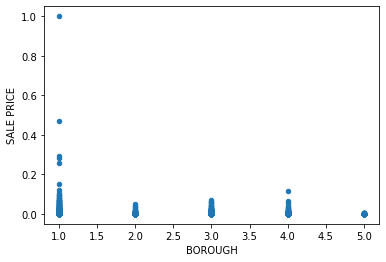

In [96]:
df_5.plot(x='BOROUGH', y='SALE PRICE', kind='scatter')
plt.show()

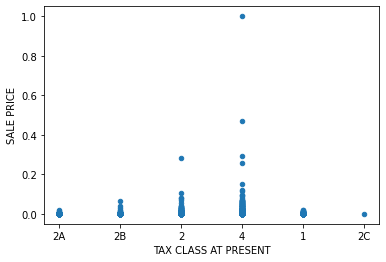

In [97]:
df_5.plot(x='TAX CLASS AT PRESENT', y='SALE PRICE', kind='scatter')
plt.show()

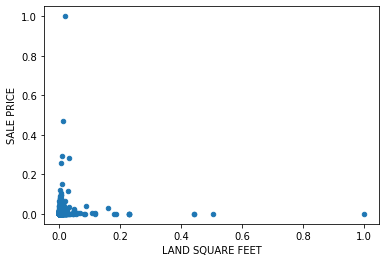

In [98]:
df_5.plot(x='LAND SQUARE FEET', y='SALE PRICE', kind='scatter')
plt.show()

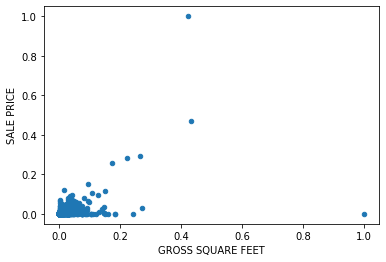

In [99]:
df_5.plot(x='GROSS SQUARE FEET', y='SALE PRICE', kind='scatter')
plt.show()

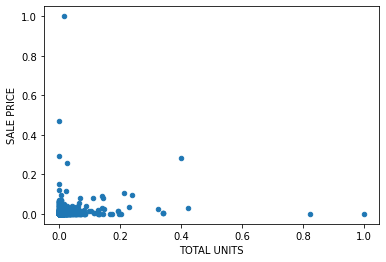

In [100]:
df_5.plot(x='TOTAL UNITS', y='SALE PRICE', kind='scatter')
plt.show()

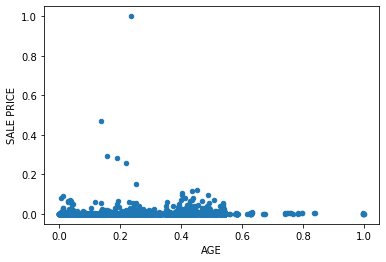

In [101]:
df_5.plot(x='AGE', y='SALE PRICE', kind='scatter')
plt.show()

In [102]:
#Use OneHotEncoder to encode categorical columns
encoder = OneHotEncoder()
cols_to_onehot=df_5[['BOROUGH','TAX CLASS AT PRESENT']]
onehot_cols = encoder.fit_transform(cols_to_onehot)

In [103]:
#Ccrate a pandas data frame from scarse matrix 
onehot_df = pd.DataFrame(onehot_cols.toarray(), columns=encoder.get_feature_names(['B', 'TAX']))
onehot_df.head()

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,B_1,B_2,B_3,B_4,B_5,TAX_1,TAX_2,TAX_2A,TAX_2B,TAX_2C,TAX_4
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [104]:
#Concatinate encoded dataframe with the origial data frame and remove the original column
df_6 = pd.concat([df_5, onehot_df], axis=1)
df_6.drop(['BOROUGH','TAX CLASS AT PRESENT'], axis=1, inplace =True)
df_6.head()

,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,SALE PRICE,AGE,B_1,B_2,B_3,B_4,B_5,TAX_1,TAX_2,TAX_2A,TAX_2B,TAX_2C,TAX_4
0,0.001770,0.000339,0.001685,0.002998,0.539546,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.003982,0.000490,0.001780,0.001781,0.475810,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.002212,0.000513,0.001199,0.003620,0.536464,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.003097,0.000367,0.001095,0.001445,0.443532,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.010177,0.001014,0.004907,0.007345,0.444101,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [105]:
# Separate the data into input features X and target y
y=df_6['SALE PRICE']
X=df_6.drop('SALE PRICE',axis=1)

In [106]:
y

0        0.002998
1        0.001781
2        0.003620
3        0.001445
4        0.007345
           ...   
29276    0.000204
29277    0.000249
29278    0.000208
29279    0.005291
29280    0.000031
Name: SALE PRICE, Length: 29281, dtype: float64

In [107]:
X

,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,AGE,B_1,B_2,B_3,B_4,B_5,TAX_1,TAX_2,TAX_2A,TAX_2B,TAX_2C,TAX_4
0,0.001770,0.000339,0.001685,0.539546,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.003982,0.000490,0.001780,0.475810,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.002212,0.000513,0.001199,0.536464,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.003097,0.000367,0.001095,0.443532,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.010177,0.001014,0.004907,0.444101,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29276,0.000442,0.000520,0.000655,0.084585,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
29277,0.000442,0.000544,0.000602,0.086403,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
29278,0.000442,0.000899,0.000367,0.424060,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
29279,0.002655,0.049155,0.017064,0.071034,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [108]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [109]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# **LINEAR REGRESSION**

In [110]:
# Create an instance of the LinearRegression class and fit the model to the training data
lr = LinearRegression()

lr.fit(X_train, y_train)


LinearRegression()

In [111]:
# Predict the target variable on the testing data
y_pred = lr.predict(X_test)

In [112]:

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('Mean squared error: ', mse)
print('R-squared value: ', r2)

Mean squared error:  1.5628732797513733e-05
R-squared value:  0.30850876462697086


# **XGBRegressor**

In [113]:
import xgboost as xgb
from sklearn.metrics import  mean_squared_error, r2_score

In [114]:
xgb_reg = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

In [115]:
xgb_reg.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=42, ...)

In [116]:
y_pred = xgb_reg.predict(X_test)

In [117]:
mse = mean_squared_error(y_test, y_pred)
mse

1.89313094234954e-05

In [118]:
r2 = r2_score(y_test, y_pred)
r2

0.1623866944244875

# **RandomForestRegressor**

In [119]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import  mean_squared_error, r2_score

In [120]:
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)

In [121]:
rf_reg.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [122]:
y_pred = rf_reg.predict(X_test)

In [123]:
mse = mean_squared_error(y_test, y_pred)
mse

1.3441932287894124e-05

In [124]:
r2 = r2_score(y_test, y_pred)
r2

0.4052634667197592